In [5]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [7]:
from sklearn.base import BaseEstimator
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np;



class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred;

titanic_df = pd.read_csv('./titanic/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)
myclf = MyDummyClassifier();
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(accuracy_score(y_test, mypredictions))

0.7877094972067039


In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    
digits=load_digits()

y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)


In [14]:
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier();
fakeclf.fit(X_train, y_train)

fakepred =fakeclf.predict(X_test)

print(accuracy_score(y_test, fakepred))


0    405
1     45
dtype: int64
0.9


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    
    print('confusion matrix')
    print(confusion)
    print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')
    print(f'f1: {f1}')
    return precision,recall;
    
titanic_df=pd.read_csv('./titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state = 11)

lr_clf = LogisticRegression();

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)






confusion matrix
[[104  14]
 [ 13  48]]
accuracy:0.8491620111731844, precision:0.7741935483870968, recall:0.7868852459016393
f1: 0.7804878048780488


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7741935483870968, 0.7868852459016393)

In [47]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)

from sklearn.preprocessing import Binarizer

pred_proba_1 = pred_proba[:,1].reshape(-1,1)
precisions=[]
recalls=[]
def get_result(threshold):
    binarizer = Binarizer(threshold=threshold)
    custom_predict=binarizer.transform(pred_proba_1)
    precision, recall = get_clf_eval(y_test, custom_predict)
    precisions.append(precision)
    recalls.append(recall)
    return;


In [48]:
thresholds=[round(0.2+i*0.033,3) for i in range(20)]

print(thresholds)

for thresh in thresholds:
    get_result(thresh)


[0.2, 0.233, 0.266, 0.299, 0.332, 0.365, 0.398, 0.431, 0.464, 0.497, 0.53, 0.563, 0.596, 0.629, 0.662, 0.695, 0.728, 0.761, 0.794, 0.827]
confusion matrix
[[75 43]
 [ 6 55]]
accuracy:0.7262569832402235, precision:0.5612244897959183, recall:0.9016393442622951
f1: 0.6918238993710693
confusion matrix
[[78 40]
 [ 6 55]]
accuracy:0.7430167597765364, precision:0.5789473684210527, recall:0.9016393442622951
f1: 0.7051282051282052
confusion matrix
[[85 33]
 [ 6 55]]
accuracy:0.7821229050279329, precision:0.625, recall:0.9016393442622951
f1: 0.738255033557047
confusion matrix
[[89 29]
 [ 6 55]]
accuracy:0.8044692737430168, precision:0.6547619047619048, recall:0.9016393442622951
f1: 0.7586206896551725
confusion matrix
[[94 24]
 [ 7 54]]
accuracy:0.8268156424581006, precision:0.6923076923076923, recall:0.8852459016393442
f1: 0.7769784172661871
confusion matrix
[[96 22]
 [ 9 52]]
accuracy:0.8268156424581006, precision:0.7027027027027027, recall:0.8524590163934426
f1: 0.7703703703703704
confusion ma

In [44]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'score:{f1}')


score:0.7804878048780488


0.9024034454015005


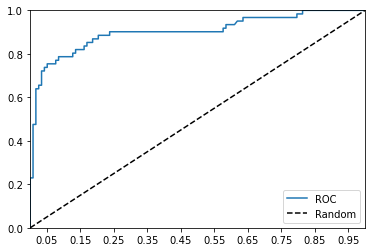

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba_class1=lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index =np.arange(1, thresholds.shape[0], 5)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], 'k--', label='Random')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()

pred_proba =lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(roc_score)
